# Project: Regression with Geographical Origin of Music Dataset

*By Daniel Deutsch, José Lucas Barretto, Kevin kühl and Lucas Miguel Agrizzi*

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Matplotlib styles
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.prop_cycle': plt.cycler(color=["#4C72B0", "#C44E52", "#55A868", "#8172B2", "#CCB974", "#64B5CD"]),
    'axes.facecolor': "#EAEAF2"
})

# Import Data

In [3]:
df1 = pd.read_csv('./datasets/default_features_1059_tracks.txt', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-1.504263,0.351267,-1.018726,-0.174878,-1.089543,-0.668840,-0.914772,-0.836250,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,-0.495712,-0.465077,-0.157861,-0.157189,0.380951,1.088478,-0.123595,1.391141,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,-0.637167,0.147260,0.217914,2.718442,0.972919,2.081069,1.375763,1.063847,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,-0.178325,-0.065059,-0.724247,-1.020687,-0.751380,-0.385005,-0.012326,-0.392197,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,-0.919463,-0.667912,-0.820172,-0.190488,0.306974,0.119658,0.271838,1.289783,34.03,-6.85


In [4]:
df2 = pd.read_csv('./datasets/default_plus_chromatic_features_1059_tracks.txt', header=None)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,108,109,110,111,112,113,114,115,116,117
0,7.161286,7.835325,2.911583,0.984049,-1.499546,-2.094097,0.576000,-1.205671,1.849122,-0.425598,...,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-0.364194,-15.75,-47.95
1,0.225763,-0.094169,-0.603646,0.497745,0.874036,0.290280,-0.077659,-0.887385,0.432062,-0.093963,...,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,0.936616,14.91,-23.51
2,-0.692525,-0.517801,-0.788035,1.214351,-0.907214,0.880213,0.406899,-0.694895,-0.901869,-1.701574,...,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,0.603755,12.65,-8.00
3,-0.735562,-0.684055,2.058215,0.716328,-0.011393,0.805396,1.497982,0.114752,0.692847,0.052377,...,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,0.187169,9.03,38.74
4,0.570272,0.273157,-0.279214,0.083456,1.049331,-0.869295,-0.265858,-0.401676,-0.872639,1.147483,...,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,1.620715,34.03,-6.85


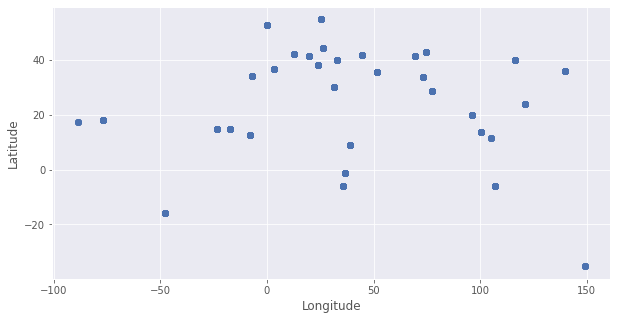

In [5]:
plt.figure(figsize=(10,5))
plt.scatter(df1[69], df1[68])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Data Filtering

#### Transform the LatLong in labels

In [6]:
# Transform the LatLong in labels
subset = df2[[116,117]]
df2['label'] = list(zip(subset[116], subset[117]))
LatLongs = list(df2['label'].unique())
labels = np.arange(len(LatLongs))
dictionary = dict(zip(LatLongs, labels))
df2['label'] = df2.label.map(dictionary)
df1['label'] = df2['label']

In [7]:
# Convert to numpy array
X1 = df1.drop([68,69,'label'], axis=1).to_numpy()
X2 = df2.drop([116,117,'label'], axis=1).to_numpy()
y = df1['label'].to_numpy()
y_cord = df2[[116,117,'label']].to_numpy()

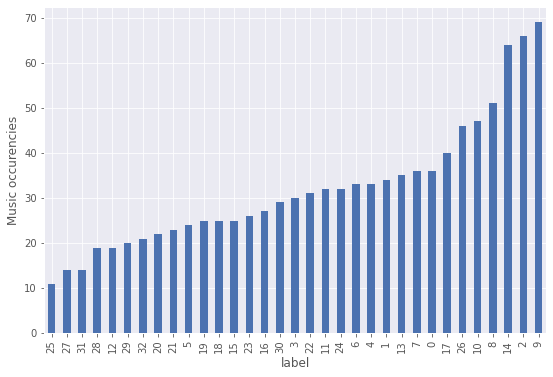

In [8]:
# Number of occurencies each country
plt.figure(figsize=(9,6))
df1.groupby(['label']).count()[0].sort_values().plot.bar()
plt.ylabel('Music occurencies')
plt.show()

In [9]:
# See how the data is distributed
df2.describe()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,116,117,label
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,...,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,-0.019312,-0.021095,-0.029824,-0.041360,0.025364,0.003521,-0.021183,0.010021,-0.030965,-0.017495,...,0.013183,0.013183,0.013183,0.013183,0.013183,0.013183,0.013183,26.651294,38.405656,13.888574
std,0.987911,0.986098,0.972813,0.984577,0.999363,1.000305,0.989127,1.007714,1.007447,1.017138,...,1.016814,1.016814,1.016814,1.016814,1.016814,1.016814,1.016814,18.459432,50.419790,9.083776
min,-1.529463,-1.476560,-1.133667,-3.222673,-3.386389,-4.366687,-4.291933,-5.287408,-5.281537,-6.856486,...,-0.850211,-0.850211,-0.850211,-0.850211,-0.850211,-0.850211,-0.850211,-35.300000,-88.760000,0.000000
25%,-0.607617,-0.621808,-0.599230,-0.640634,-0.599677,-0.633760,-0.608229,-0.556419,-0.513522,-0.464189,...,-0.607203,-0.607203,-0.607203,-0.607203,-0.607203,-0.607203,-0.607203,14.660000,3.210000,7.000000
50%,-0.184135,-0.211257,-0.301310,-0.134986,0.157396,0.011760,0.037887,0.042447,0.074414,0.091507,...,-0.327437,-0.327437,-0.327437,-0.327437,-0.327437,-0.327437,-0.327437,33.660000,32.830000,13.000000
75%,0.312155,0.310377,0.158689,0.459267,0.735870,0.662538,0.643826,0.574328,0.583657,0.569681,...,0.232095,0.232095,0.232095,0.232095,0.232095,0.232095,0.232095,39.910000,74.600000,21.000000
max,9.439499,10.719304,6.157847,5.926862,2.280230,2.897006,2.720127,3.127494,3.948652,3.492393,...,8.222786,8.222786,8.222786,8.222786,8.222786,8.222786,8.222786,54.680000,149.120000,32.000000


##### Separate in train and test

In [10]:
# Separate train and test datasets
from sklearn.model_selection import train_test_split

# Separate train and test datasets
X1_train, X1_test, y1_train_, y1_test_ = train_test_split(
    X1, y_cord, test_size=0.3, shuffle=False, random_state=0)

# keep the cordnates and labels
y1_train_cord = y1_train_[:,0:2]
y1_train = y1_train_[:,2]
y1_test_cord = y1_test_[:,0:2]
y1_test = y1_test_[:,2]

# Separate train and test datasets
X2_train, X2_test, y2_train_, y2_test_ = train_test_split(
    X2, y_cord, test_size=0.3, shuffle=False, random_state=0)

# keep the cordnates and labels
y1_train_cord = y2_train_[:,0:2]
y2_train = y2_train_[:,2]
y1_test_cord = y2_test_[:,0:2]
y2_test = y2_test_[:,2]

#### Normalize the data

In [11]:
from sklearn.preprocessing import StandardScaler

# Normal dataset
X1_scaler = StandardScaler().fit(X1_train)

X1_train = X1_scaler.transform(X1_train)
X1_test = X1_scaler.transform(X1_test)

# Chronoplast
X2_scaler = StandardScaler().fit(X2_train)

X2_train = X2_scaler.transform(X2_train)
X2_test = X2_scaler.transform(X2_test)

#### We want to see how the PC vectors can describe the variance of the dataset

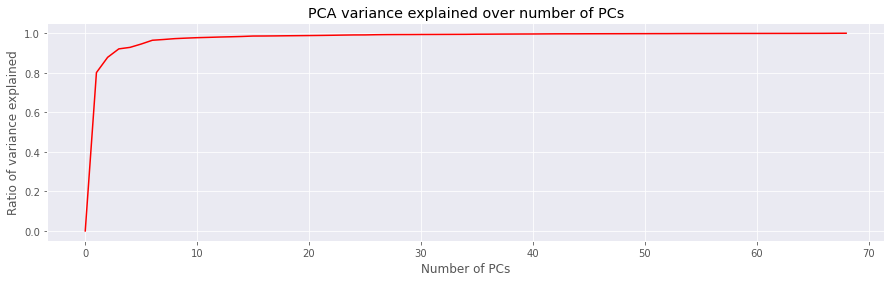

In [12]:
from sklearn.decomposition import PCA

PCA_var = PCA(n_components = X1_train.shape[1])
PCA_var.fit(X1_train)
PCA_var_exp = [1 - x/sum(PCA_var.explained_variance_) for x in PCA_var.explained_variance_]

PCA_var_exp.insert(0, 0)

plt.figure()
plt.title("PCA variance explained over number of PCs")
plt.xlabel("Number of PCs")
plt.ylabel("Ratio of variance explained")
plt.plot(range(0, len(PCA_var_exp), 1), PCA_var_exp, c = 'r')
plt.show()

We notice that the most part of the dataset variance can be described with some PCs. TO look more about this, we think to do a Feature Selection to decrease out space of vectors.

## Feature Engineering

#### The dataset have a lot of features and this can be a problem. We want to see which transform we can apply to this base to reduce the number of features without losing much information

In [13]:
# Models
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
gnb = GaussianNB()
svc = SVC(C=1.0)
rfc = RandomForestClassifier(random_state=0)
knc = KNeighborsClassifier(n_neighbors=33)

d = {}
df_results_pca = pd.DataFrame()

PCA_dimention = range(1, X1_train.shape[1],10)

for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest'),
                  (knc, 'KNeighbors Classifier (n=33)')]:
    
#     Apply the transformations for every dimention
    for n_comps in PCA_dimention:
        PCA_model = PCA(n_components = n_comps)
        PCA_model.fit(X1_train)
        PCA_Xtrain = PCA_model.transform(X1_train)
        PCA_Xtest = PCA_model.transform(X1_test)

#       Train
        clf.fit(PCA_Xtrain, y1_train)

#       Measure
        train_accuracy = clf.score(PCA_Xtrain, y1_train)
        test_accuracy = clf.score(PCA_Xtest, y1_test)
        d = {'model': [name], 'PCA_vectors': [n_comps], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy]}
        df_results_pca = pd.concat([df_results_pca, pd.DataFrame(d)], axis=0, ignore_index=True)
# df_results_pca  

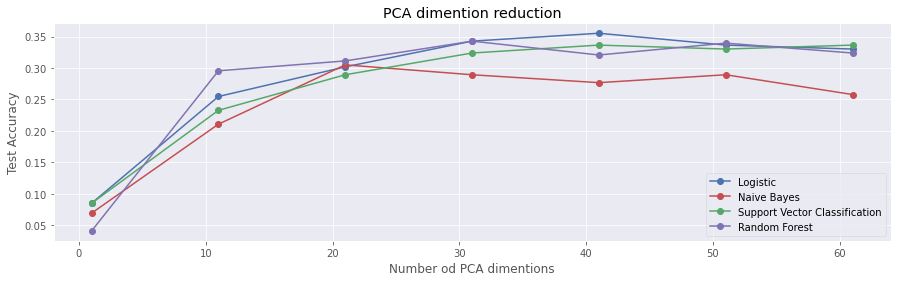

In [14]:
# Get the test scores for each model
test_LR = df_results_pca[df_results_pca.model=='Logistic']['test_accuracy'].values
test_KN = df_results_pca[df_results_pca.model=='Naive Bayes']['test_accuracy'].values
test_DT = df_results_pca[df_results_pca.model=='Support Vector Classification']['test_accuracy'].values
test_RF = df_results_pca[df_results_pca.model=='Random Forest']['test_accuracy'].values

# plot the dimention reduction
plt.plot(PCA_dimention, test_LR, '-o', label='Logistic')
plt.plot(PCA_dimention, test_KN, '-o', label='Naive Bayes')
plt.plot(PCA_dimention, test_DT, '-o', label='Support Vector Classification')
plt.plot(PCA_dimention, test_RF, '-o', label='Random Forest')
plt.legend()
plt.title('PCA dimention reduction')
plt.xlabel('Number od PCA dimentions')
plt.ylabel('Test Accuracy')
plt.show()

#### We can notive that, over 40 features in the PCA decomposition, the model keep almost the same accuracy. So we decided to keep 40 features only. This makes the model run faster and take out possibles bad features.

In [15]:
# Reduce the dimention to 40 features
PCA_model = PCA(n_components = 40)
PCA_model.fit(X1_train)
X1_train = PCA_model.transform(X1_train)
X1_test = PCA_model.transform(X1_test)

### The same for the second dataset

In [16]:
# Models
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
gnb = GaussianNB()
svc = SVC(C=1.0)
rfc = RandomForestClassifier(random_state=0)
knc = KNeighborsClassifier(n_neighbors=33)

d = {}
df_results_pca = pd.DataFrame()

PCA_dimention = range(1, X2_train.shape[1],10)

for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest'),
                  (knc, 'KNeighbors Classifier (n=33)')]:
    
    #     Apply the transformations for every dimention
    for n_comps in PCA_dimention:
        PCA_model = PCA(n_components = n_comps)
        PCA_model.fit(X2_train)
        PCA_Xtrain = PCA_model.transform(X2_train)
        PCA_Xtest = PCA_model.transform(X2_test)

#         Train
        clf.fit(PCA_Xtrain, y2_train)

#       Measure scores
        train_accuracy = clf.score(PCA_Xtrain, y2_train)
        test_accuracy = clf.score(PCA_Xtest, y2_test)
        d = {'model': [name], 'PCA_vectors': [n_comps], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy]}
        df_results_pca = pd.concat([df_results_pca, pd.DataFrame(d)], axis=0, ignore_index=True)
# df_results_pca  

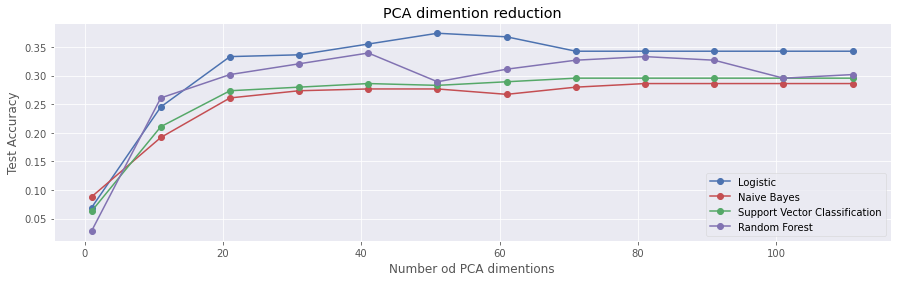

In [17]:
# Get the test scores for each model
test_LR = df_results_pca[df_results_pca.model=='Logistic']['test_accuracy'].values
test_KN = df_results_pca[df_results_pca.model=='Naive Bayes']['test_accuracy'].values
test_DT = df_results_pca[df_results_pca.model=='Support Vector Classification']['test_accuracy'].values
test_RF = df_results_pca[df_results_pca.model=='Random Forest']['test_accuracy'].values

# plot the dimention reduction
plt.plot(PCA_dimention, test_LR, '-o', label='Logistic')
plt.plot(PCA_dimention, test_KN, '-o', label='Naive Bayes')
plt.plot(PCA_dimention, test_DT, '-o', label='Support Vector Classification')
plt.plot(PCA_dimention, test_RF, '-o', label='Random Forest')
plt.legend()
plt.title('PCA dimention reduction')
plt.xlabel('Number od PCA dimentions')
plt.ylabel('Test Accuracy')
plt.show()

#### We can notive that, over 50 features in the PCA decomposition, the model keep almost the same accuracy. So we decided to keep 50 features only. This makes the model run faster and take out possibles bad features.

In [18]:
# Reduce the dimention to 40 features
PCA_model = PCA(n_components = 50)
PCA_model.fit(X2_train)
X2_train = PCA_model.transform(X2_train)
X2_test = PCA_model.transform(X2_test)

# Models

## Multiclass

The first aproach that we are going to attack the problem is to solve by a classification method. For each country, we create a label indepent of the world region and we will try to predict from which label the music is.

#### Logistic, Naive Bayes, Support Vector Classification and Random Forest models

Let's start with some simple model without much optimization. We made this just to analyse the first metrics that can be easy achievable

In [19]:
# Create classifiers
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
gnb = GaussianNB()
svc = SVC(C=1.0)
rfc = RandomForestClassifier(random_state=0)
knc = KNeighborsClassifier(n_neighbors=33)

d = {}
df_results = pd.DataFrame()

for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest'),
                  (knc, 'KNeighbors Classifier (n=33)')]:
    clf.fit(X1_train, y1_train)
    train_accuracy = clf.score(X1_train, y1_train)
    test_accuracy = clf.score(X1_test, y1_test)
    d = {'model': [name], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy]}
    df_results = pd.concat([df_results, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results

,model,train_accuracy,test_accuracy
0,Logistic,0.723347,0.339623
1,Naive Bayes,0.599190,0.276730
2,Support Vector Classification,0.728745,0.330189
3,Random Forest,1.000000,0.367925
4,KNeighbors Classifier (n=33),0.349528,0.254717


#### XGBoost model

In [20]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X1_train, label=y1_train)
dtest = xgb.DMatrix(data=X1_test)

/home/lucasagrizzi/anaconda3/envs/mod203/lib/python3.8/site-packages/xgboost/data.py:104: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [21]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 33,
    'n_gpus': 0
}

bst = xgb.train(params, dtrain)
pred_train = bst.predict(dtrain)
pred_test = bst.predict(dtest)

# store the score

train_accuracy = (pred_train==y1_train).mean()
test_accuracy = (pred_test==y1_test).mean()

d = {'model': ['XGBoost'], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy]}
df_results = pd.concat([df_results, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results


[20:57:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,model,train_accuracy,test_accuracy
0,Logistic,0.723347,0.339623
1,Naive Bayes,0.599190,0.276730
2,Support Vector Classification,0.728745,0.330189
3,Random Forest,1.000000,0.367925
4,KNeighbors Classifier (n=33),0.349528,0.254717
5,XGBoost,0.974359,0.295597


In a first approach, we can see that without much optimization we could have an accuracy approximatly over 33% for the Logistic Regression, SVC and Random Forest.

Moreover, we want to see the influence of the optimization in the accuracy score. To avoid much problems like overfitting, we use cross validation with 5 folds.

### Optimize SVC

#### Linear Kernel

In [22]:
# Find the best working C with a 5-fold cross-validation
# generate cross validation sets
cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=0)

# generate hyperparameters spaces
C = np.logspace(-5, 5, 10)

train_mean_scores = []
test_mean_scores = []

for i in range(len(C)):
    model = SVC(kernel='linear', C=C[i])
    
    # evaluate model
    train_scores = cross_val_score(model, X1_train, y1_train, scoring='accuracy', cv=cv, n_jobs=-1)
    train_mean_scores.append(np.mean(train_scores))
    
    test_scores = model.fit(X1_train, y1_train).score(X1_test, y1_test)
    test_mean_scores.append(np.mean(test_scores))

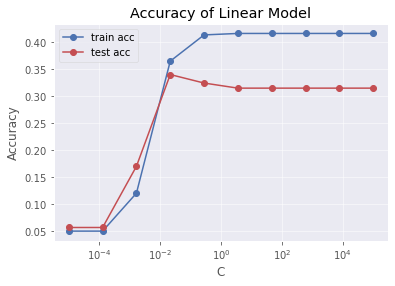

Test Score: 0.33962264150943394 with C = 0.021544346900318846


In [23]:
# plot results
plt.figure(figsize=(6,4))
plt.title('Accuracy of Linear Model')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.plot(C, train_mean_scores, '-o', label='train acc')
plt.plot(C, test_mean_scores, '-o', label='test acc')
plt.legend()
plt.xscale('log')
plt.grid(alpha=0.6)
plt.show()

# print optimum C value

C_opt = C[np.argmax(test_mean_scores)]
train_accuracy = test_mean_scores[np.argmax(test_mean_scores)]
test_accuracy = max(test_mean_scores)

print('Test Score:', test_accuracy, 'with C =', C_opt)

We can see the problem of overfitting happening when the train accuracy increases at the same time as the test decreases. To solve this get the best test parameter and stop that.

In [24]:
d = {'model': ['SVC_linear_opt'], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy], 'C_opt': [C_opt]}
df_results = pd.concat([df_results, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results

,model,train_accuracy,test_accuracy,C_opt
0,Logistic,0.723347,0.339623,NaN
1,Naive Bayes,0.599190,0.276730,NaN
2,Support Vector Classification,0.728745,0.330189,NaN
3,Random Forest,1.000000,0.367925,NaN
4,KNeighbors Classifier (n=33),0.349528,0.254717,NaN
5,XGBoost,0.974359,0.295597,NaN
6,SVC_linear_opt,0.339623,0.339623,0.021544


#### Polynomial kernel

In [25]:
import itertools as it

C = np.logspace(-2, 3, 10)
degrees = range(2,7)

# linear search for best hyper parameters
best_score = 0
for _,(c, degree) in enumerate(it.product(C, degrees)):
    model = SVC(kernel='poly', C=c, degree=degree)
    
    # evaluate model
    scores = cross_val_score(model, X1_train, y1_train, scoring='accuracy', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    
    if score > best_score:
        best_score = score
        C_opt = c
        degree_opt = degree

model = SVC(kernel='poly', C=C_opt, degree=degree_opt)
test_accuracy = model.fit(X1_train, y1_train).score(X1_test, y1_test)

In [26]:
# store and print results
d = {'model': ['SVC_poly_opt'], 'train_accuracy': [best_score], 'test_accuracy': [test_accuracy], 'C_opt': [C_opt], 'degree_opt': [degree_opt]}
print('SVC_Poly Best Score:', best_score, 'with C =', C_opt, ', degree =', degree_opt)

df_results = pd.concat([df_results, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results

SVC_Poly Best Score: 0.3792671866497371 with C = 21.544346900318846 , degree = 3


,model,train_accuracy,test_accuracy,C_opt,degree_opt
0,Logistic,0.723347,0.339623,NaN,NaN
1,Naive Bayes,0.599190,0.276730,NaN,NaN
2,Support Vector Classification,0.728745,0.330189,NaN,NaN
3,Random Forest,1.000000,0.367925,NaN,NaN
4,KNeighbors Classifier (n=33),0.349528,0.254717,NaN,NaN
5,XGBoost,0.974359,0.295597,NaN,NaN
6,SVC_linear_opt,0.339623,0.339623,0.021544,NaN
7,SVC_poly_opt,0.379267,0.330189,21.544347,3.0


#### Gaussian Kernel

In [27]:
# generate hyperparameters spaces
C = np.logspace(0, 5, 5)
gammas = np.logspace(-7, 1, 5)

# linear search for best hyper parameters
best_score = 0
for _,(c, gamma) in enumerate(it.product(C, gammas)):
    model = SVC(kernel='rbf', C=c, gamma=gamma)
    
    # evaluate model
    scores = cross_val_score(model, X1, y, scoring='accuracy', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    
    if score > best_score:
        best_score = score
        C_opt = c
        gamma_opt = gamma

model = SVC(kernel='rbf', C=C_opt, gamma=gamma_opt)
test_accuracy = model.fit(X1_train, y1_train).score(X1_test, y1_test)

In [28]:
# store and print results
d = {'model': ['SVC_rbf_opt'], 'train_accuracy': [best_score], 'test_accuracy': [test_accuracy], 'C_opt': [C_opt], 'gamma': [gamma_opt]}
print('RBF Best Score:', best_score, 'with C =', C_opt, ', gamma =', gamma_opt)

df_results = pd.concat([df_results, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results

RBF Best Score: 0.42966556380219983 with C = 316.22776601683796 , gamma = 0.001


,model,train_accuracy,test_accuracy,C_opt,degree_opt,gamma
0,Logistic,0.723347,0.339623,NaN,NaN,NaN
1,Naive Bayes,0.599190,0.276730,NaN,NaN,NaN
2,Support Vector Classification,0.728745,0.330189,NaN,NaN,NaN
3,Random Forest,1.000000,0.367925,NaN,NaN,NaN
4,KNeighbors Classifier (n=33),0.349528,0.254717,NaN,NaN,NaN
5,XGBoost,0.974359,0.295597,NaN,NaN,NaN
6,SVC_linear_opt,0.339623,0.339623,0.021544,NaN,NaN
7,SVC_poly_opt,0.379267,0.330189,21.544347,3.0,NaN
8,SVC_rbf_opt,0.429666,0.371069,316.227766,NaN,0.001


We made the optimization for the SVC until here. We can see that the model with the Gaussian kernel could increase over 3% more comparing with the SVC without opmization. But the accuracy is still low.

We want to optimize the Random Forest method to find see the affect in the prediction. To do this we make a grid search in the list of parameters.

In [29]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
# Params for Grid search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [300, 1000]
}# Create a based model
rf = RandomForestClassifier(random_state=0)# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
# Fit the grid search to the data
grid_search.fit(X1_train, y1_train)

best_grid = grid_search.best_estimator_
grid_search.best_params_

Fitting 3 folds for each of 32 candidates, totalling 96 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [31]:
# Find the score for the best model
best_grid.fit(X1_train, y1_train)
train_accuracy = best_grid.score(X1_train, y1_train)
test_accuracy = best_grid.score(X1_test, y1_test)
d = {'model': ['Random Forest_opt'], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy]}
df_results = pd.concat([df_results, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results

,model,train_accuracy,test_accuracy,C_opt,degree_opt,gamma
0,Logistic,0.723347,0.339623,NaN,NaN,NaN
1,Naive Bayes,0.599190,0.276730,NaN,NaN,NaN
2,Support Vector Classification,0.728745,0.330189,NaN,NaN,NaN
3,Random Forest,1.000000,0.367925,NaN,NaN,NaN
4,KNeighbors Classifier (n=33),0.349528,0.254717,NaN,NaN,NaN
5,XGBoost,0.974359,0.295597,NaN,NaN,NaN
6,SVC_linear_opt,0.339623,0.339623,0.021544,NaN,NaN
7,SVC_poly_opt,0.379267,0.330189,21.544347,3.0,NaN
8,SVC_rbf_opt,0.429666,0.371069,316.227766,NaN,0.001
9,Random Forest_opt,1.000000,0.336478,NaN,NaN,NaN


We can see that the optimization of the Random Forest in the classification could increase around 2.5% in the test accuracy.

We can see that the Classification do not have a high accuracy to predict from witch country the music is. To solve in another approach we separete the world in 8 regions (this number is better explained in the final part of the project). With this division in areas, we are not predicting from each country the music is anymore, but for each region in the globe it is. This can be explained empirically as the geographical influences can also affect the composition of musics. So our algorithm tries to predict from each region the music is.

In [34]:
# Models
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg')
gnb = GaussianNB()
svc = SVC(C=1.0)
rfc = RandomForestClassifier(random_state=0)
knc = KNeighborsClassifier(n_neighbors=33)

# Divide in 8 clusters
kmeans = KMeans(n_clusters=8, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y1_train_cord)
labels_train = kmeans.predict(y1_train_cord)
labels_test = kmeans.predict(y1_test_cord)
centers = kmeans.cluster_centers_

for clf, name in [(lr, '8-Cluster Logistic'),
                  (gnb, '8-Cluster Naive Bayes'),
                  (svc, '8-Cluster Support Vector Classification'),
                  (rfc, '8-Cluster Random Forest'),
                  (knc, '8-Cluster KNeighbors Classifier (n=33)')]:
    clf.fit(X1_train, labels_train)
    train_accuracy = clf.score(X1_train, labels_train)
    test_accuracy = clf.score(X1_test, labels_test)
    d = {'model': [name], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy]}
    df_results = pd.concat([df_results, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results

,model,train_accuracy,test_accuracy,C_opt,degree_opt,gamma
0,Logistic,0.723347,0.339623,NaN,NaN,NaN
1,Naive Bayes,0.599190,0.276730,NaN,NaN,NaN
2,Support Vector Classification,0.728745,0.330189,NaN,NaN,NaN
3,Random Forest,1.000000,0.367925,NaN,NaN,NaN
4,KNeighbors Classifier (n=33),0.349528,0.254717,NaN,NaN,NaN
5,XGBoost,0.974359,0.295597,NaN,NaN,NaN
6,SVC_linear_opt,0.339623,0.339623,0.021544,NaN,NaN
7,SVC_poly_opt,0.379267,0.330189,21.544347,3.0,NaN
8,SVC_rbf_opt,0.429666,0.371069,316.227766,NaN,0.001
9,Random Forest_opt,1.000000,0.336478,NaN,NaN,NaN


Finally we can notice that the accuracy grows to 45% in average, with a maximum in the SVC with 48% of accuracy. This is still without optimization, but we notice that this accuracy could not be increased that much with the previous results.

Looking to this, we reach that musics are hard to classify even over regions.

The best classifier was the 8-Cluster Support Vector Classification with 48% of accuracy.

## Regression

To continue our studies, we can try to find the country of the music through a regression. Not anymore as a classifier, we will try to make a regression and discover the Latitude and Longitude of the music origin and get the point near this prediction.

In [35]:
# Separate train and test datasets
X1_train, X1_test, y1_train_, y1_test_ = train_test_split(
    X1, y_cord, test_size=0.3, shuffle=False, random_state=0)

# keep the labels and cord
y1_train = y1_train_[:,0:2]
y1_train_label = y1_train_[:,2]
y1_test = y1_test_[:,0:2]
y1_test_label = y1_test_[:,2]


# Separate train and test datasets
X2_train, X2_test, y2_train_, y2_test_ = train_test_split(
    X2, y_cord, test_size=0.3, shuffle=False, random_state=0)

# keep the labels and cord
y2_train = y2_train_[:,0:2]
y2_train_label = y2_train_[:,2]
y2_test = y2_test_[:,0:2]
y2_test_label = y2_test_[:,2]

In [36]:
# Select 40 features for dataset 1 
PCA_model = PCA(n_components = 40)
PCA_model.fit(X1_train)
X1_train = PCA_model.transform(X1_train)
X1_test = PCA_model.transform(X1_test)

# Select 50 features for dataset 2
PCA_model = PCA(n_components = 50)
PCA_model.fit(X2_train)
X2_train = PCA_model.transform(X2_train)
X2_test = PCA_model.transform(X2_test)

As we are using data from a GPS, the distance from 2 point in the map is given by the function "haversine". Also the distance can be used as a loss function.

#### Distance function = Error

In [37]:
from math import radians, cos, sin, asin, sqrt

def haversine(v):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    [lat1, lon1, lat2, lon2] = v
    
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

#### Classify per distance

In [38]:
def Class_per_distance(predict_cord, centers):
    distance_point=[]
    for cord in centers:
        distance_point.append(haversine([cord[0], cord[1], predict_cord[0], predict_cord[1]]))
    class_music = np.argmin(distance_point)
    return class_music

def Prediction_by_distance(cords_array, centers=LatLongs):
    return np.apply_along_axis(Class_per_distance, 1, cords_array, centers)

We create some simple classifiers to see the behavior of the regression for various methods. Our approach is to predict the region in the map that the music is, and get nearest country from the dataset and we can classify.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Create classifiers
lin = LinearRegression()
knr = KNeighborsRegressor(n_neighbors=33)
dtr = DecisionTreeRegressor()
rfr = RandomForestRegressor(max_depth=2, random_state=0)

d = {}
df_results_reg = pd.DataFrame()

# Regression for the first dataset
for clf, name in [(lin, 'Linear Regression'),
                  (knr, 'KNeighbors Regressor(n=33)'),
                  (dtr, 'Decision Tree Regressor'),
                  (rfr, 'Random Forest Regressor')]:
    clf.fit(X1_train, y1_train)
    train_dist = np.apply_along_axis(haversine, 1, np.concatenate((clf.predict(X1_train), y1_train), axis=1))
    test_dist = np.apply_along_axis(haversine, 1, np.concatenate((clf.predict(X1_test), y1_test), axis=1))
    
    predic_train = Prediction_by_distance(clf.predict(X1_train))
    train_accuracy = (predic_train==y1_train_label).mean()
    
    predic_test = Prediction_by_distance(clf.predict(X1_test))
    test_accuracy = (predic_test==y1_test_label).mean()
    
    d = {'model': [name], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy], 'train_dist_avg': [train_dist.mean()], 'test_dist_avg': [test_dist.mean()]}
    df_results_reg = pd.concat([df_results_reg, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results_reg

,model,train_accuracy,test_accuracy,train_dist_avg,test_dist_avg
0,Linear Regression,0.075574,0.062893,3.788873e+03,4098.674629
1,KNeighbors Regressor(n=33),0.075574,0.066038,3.908847e+03,4056.084541
2,Decision Tree Regressor,1.000000,0.116352,4.829502e-14,5225.462919
3,Random Forest Regressor,0.036437,0.034591,4.184822e+03,4261.560350


In [40]:
# Regression for the second dataset
df_results_reg2 = pd.DataFrame()
for clf, name in [(lin, 'Linear Regression'),
                  (knr, 'KNeighbors Regressor(n=33)'),
                  (dtr, 'Decision Tree Regressor'),
                  (rfr, 'Random Forest Regressor')]:
    clf.fit(X2_train, y2_train)
    train_dist = np.apply_along_axis(haversine, 1, np.concatenate((clf.predict(X2_train), y2_train), axis=1))
    test_dist = np.apply_along_axis(haversine, 1, np.concatenate((clf.predict(X2_test), y2_test), axis=1))
    
    predic_train = Prediction_by_distance(clf.predict(X2_train))
    train_accuracy = (predic_train==y2_train_label).mean()
    
    predic_test = Prediction_by_distance(clf.predict(X2_test))
    test_accuracy = (predic_test==y2_test_label).mean()
    
    d = {'model': [name], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy], 'train_dist_avg': [train_dist.mean()], 'test_dist_avg': [test_dist.mean()]}
    df_results_reg2 = pd.concat([df_results_reg2, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results_reg2

,model,train_accuracy,test_accuracy,train_dist_avg,test_dist_avg
0,Linear Regression,0.094467,0.066038,3.640408e+03,4077.212116
1,KNeighbors Regressor(n=33),0.059379,0.053459,3.811919e+03,3987.782017
2,Decision Tree Regressor,1.000000,0.122642,4.009849e-14,5395.281823
3,Random Forest Regressor,0.039136,0.066038,4.056751e+03,4211.852592


We can see that this accuracies are almost the same between the two datasets. An advantage of this model is that we can see where the music is being predicted and see the average distance in km from the origin poiint. Although, the accuracy is very low.

The mean distance to the origin country using KNN with 33 clusters is aroung $4000km$.

### Cluster

We know that music can be geograpgicaly influenced. So, to better this regression, we will try to divide the world in regions to find a better accuracy. THe main problem here is that we do not know how much regions we have to divide. Also, we expect that as less regions we have, easier will be to predict the region of the music.

To solve this, we expect to find a balance of number of regions to better the accuracy but not to lose much information.

We separate in different clusters to se the behavior of the accuracy over this

In [41]:
df_results_reg=pd.DataFrame()
n_clusters_ = range(2,33,3)

for n_clusters in n_clusters_:
    
    kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
    kmeans = kmeans.fit(y1_train)
    labels_train = kmeans.predict(y1_train)
    labels_test = kmeans.predict(y1_test)
    centers = kmeans.cluster_centers_

    for clf, name in [(lin, 'Linear Regression'),
                      (knr, 'KNeighbors Regressor(n=33)'),
                      (dtr, 'Decision Tree Regressor'),
                      (rfr, 'Random Forest Regressor')]:
        clf.fit(X1_train, y1_train)
        train_dist = np.apply_along_axis(haversine, 1, np.concatenate((clf.predict(X1_train), centers[labels_train]), axis=1))
        test_dist = np.apply_along_axis(haversine, 1, np.concatenate((clf.predict(X1_test), centers[labels_test]), axis=1))

        predic_train = Prediction_by_distance(clf.predict(X1_train), centers)
        train_accuracy = (predic_train==labels_train).mean()

        predic_test = Prediction_by_distance(clf.predict(X1_test), centers)
        test_accuracy = (predic_test==labels_test).mean()

        d = {'model': [name], 'n_clusters': [n_clusters], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy], 'train_dist_avg': [train_dist.mean()], 'test_dist_avg': [test_dist.mean()]}
        df_results_reg = pd.concat([df_results_reg, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results_reg

,model,n_clusters,train_accuracy,test_accuracy,train_dist_avg,test_dist_avg
0,Linear Regression,2,0.719298,0.701258,3231.402493,3476.585086
1,KNeighbors Regressor(n=33),2,0.682861,0.682390,3511.732368,3453.144928
2,Decision Tree Regressor,2,1.000000,0.600629,3026.983731,5289.231786
3,Random Forest Regressor,2,0.707152,0.679245,3534.260574,3600.196926
4,Linear Regression,5,0.381916,0.411950,3582.613336,3825.983403
5,KNeighbors Regressor(n=33),5,0.380567,0.430818,3626.776380,3589.651836
6,Decision Tree Regressor,5,1.000000,0.333333,1737.013019,5373.137514
7,Random Forest Regressor,5,0.350877,0.377358,3787.518382,3751.527074
8,Linear Regression,8,0.276653,0.314465,3783.489301,4064.407556
9,KNeighbors Regressor(n=33),8,0.284750,0.276730,3870.147816,4018.903293


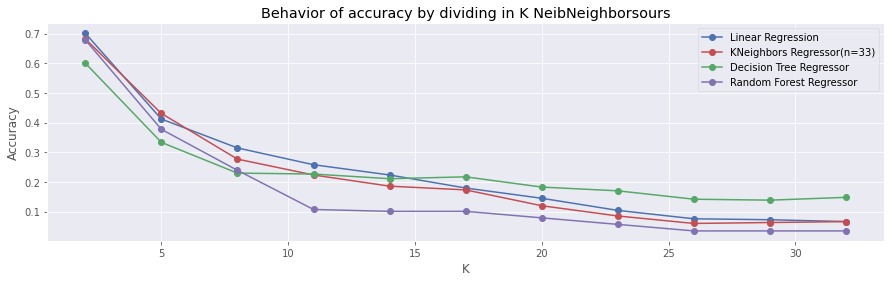

In [42]:
test_LR = df_results_reg[df_results_reg.model=='Linear Regression']['test_accuracy'].values
test_KN = df_results_reg[df_results_reg.model=='KNeighbors Regressor(n=33)']['test_accuracy'].values
test_DT = df_results_reg[df_results_reg.model=='Decision Tree Regressor']['test_accuracy'].values
test_RF = df_results_reg[df_results_reg.model=='Random Forest Regressor']['test_accuracy'].values

plt.plot(n_clusters_, test_LR, '-o', label='Linear Regression')
plt.plot(n_clusters_, test_KN, '-o', label='KNeighbors Regressor(n=33)')
plt.plot(n_clusters_, test_DT, '-o', label='Decision Tree Regressor')
plt.plot(n_clusters_, test_RF, '-o', label='Random Forest Regressor')
plt.legend()
plt.title('Behavior of accuracy by dividing in K NeibNeighborsours')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

As we expected, as more clusters we have, more dificult is to predict the region of the music. If we look only to the accuracy, we would get 1 cluster only because that woulg give a 100% accuracy. But we can look until how much clusters the distance to the centroids start not to change much

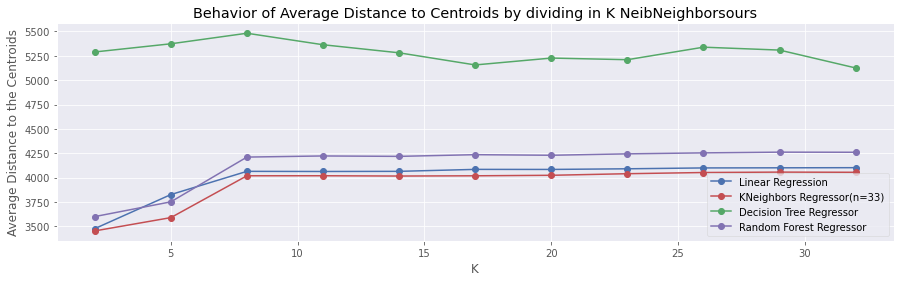

In [43]:
test_LR = df_results_reg[df_results_reg.model=='Linear Regression']['test_dist_avg'].values
test_KN = df_results_reg[df_results_reg.model=='KNeighbors Regressor(n=33)']['test_dist_avg'].values
test_DT = df_results_reg[df_results_reg.model=='Decision Tree Regressor']['test_dist_avg'].values
test_RF = df_results_reg[df_results_reg.model=='Random Forest Regressor']['test_dist_avg'].values

plt.plot(n_clusters_, test_LR, '-o', label='Linear Regression')
plt.plot(n_clusters_, test_KN, '-o', label='KNeighbors Regressor(n=33)')
plt.plot(n_clusters_, test_DT, '-o', label='Decision Tree Regressor')
plt.plot(n_clusters_, test_RF, '-o', label='Random Forest Regressor')
plt.legend()
plt.title('Behavior of Average Distance to Centroids by dividing in K NeibNeighborsours')
plt.xlabel('K')
plt.ylabel('Average Distance to the Centroids')
plt.show()

Moreover, we can see that in 8 clusters, the average distance between the prediction and the centroid stop to change much. Given this, we could find a balance on the clusters to better the accuracy.

### Region of clusters

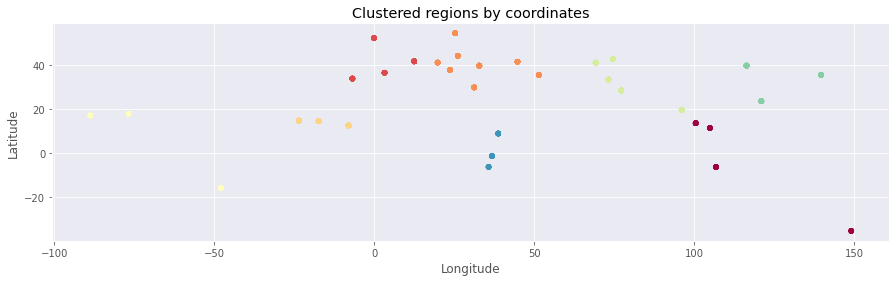

In [44]:
# Separete in 8 clusters
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, max_iter = 500, algorithm='full')
kmeans = kmeans.fit(y1_train)
labels_train = kmeans.predict(y1_train)
labels_test = kmeans.predict(y1_test)
centers = kmeans.cluster_centers_

# plot how the regions are
label_color = [matplotlib.cm.get_cmap('Spectral')(float(l) /n_clusters) for l in labels_train]
plt.scatter(y1_train[:, 1], y1_train[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()

To see how the predictions can behave, we plot to see where the predictions are going. We use the KNN method because it showed a better accuracy.

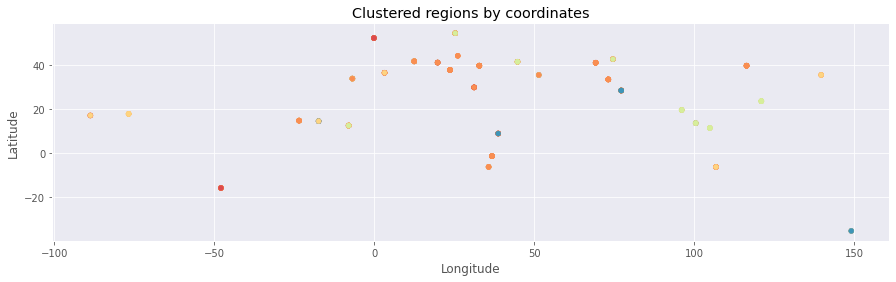

,model,n_clusters,train_accuracy,test_accuracy,train_dist_avg,test_dist_avg
8,Linear Regression,8,0.276653,0.314465,3783.489301,4064.407556
9,KNeighbors Regressor(n=33),8,0.284750,0.276730,3870.147816,4018.903293
10,Decision Tree Regressor,8,1.000000,0.229560,1096.521114,5481.363063
11,Random Forest Regressor,8,0.241565,0.238994,4131.881717,4210.697433


In [45]:
# predict with KNN
knr.fit(X1_train, y1_train)
predic_test = Prediction_by_distance(knr.predict(X1_test), centers)

# Plot in the map
label_color = [matplotlib.cm.get_cmap('Spectral')(float(l) /n_clusters) for l in predic_test]
plt.scatter(y1_test[:, 1], y1_test[:, 0], c = label_color, s=25)
plt.title("Clustered regions by coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()
df_results_reg[df_results_reg['n_clusters']==8]

After we already have the number of clusters, we want to optimize the algorithms. To do this we made a grid seach for the Random Forest Regression.

In [46]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 1000]
}# Create a based model
rf = RandomForestRegressor()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

Find the best hyperparameters.

In [47]:
# Fit the grid search to the data
grid_search.fit(X1_train, y1_train)
# grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [48]:
predic_train = Prediction_by_distance(best_grid.predict(X1_train), centers)
train_accuracy = (predic_train==labels_train).mean()

predic_test = Prediction_by_distance(best_grid.predict(X1_test), centers)
test_accuracy = (predic_test==labels_test).mean()

train_dist = np.apply_along_axis(haversine, 1, np.concatenate((best_grid.predict(X1_train), centers[labels_train]), axis=1))
test_dist = np.apply_along_axis(haversine, 1, np.concatenate((best_grid.predict(X1_test), centers[labels_test]), axis=1))


In [49]:
d = {'model': ['OPT Random Forest Reg'], 'n_clusters': [n_clusters], 'train_accuracy': [train_accuracy], 'test_accuracy': [test_accuracy], 'train_dist_avg': [train_dist.mean()], 'test_dist_avg': [test_dist.mean()]}
df_results_reg = pd.concat([df_results_reg, pd.DataFrame(d)], axis=0, ignore_index=True)
df_results_reg

,model,n_clusters,train_accuracy,test_accuracy,train_dist_avg,test_dist_avg
0,Linear Regression,2,0.719298,0.701258,3231.402493,3476.585086
1,KNeighbors Regressor(n=33),2,0.682861,0.682390,3511.732368,3453.144928
2,Decision Tree Regressor,2,1.000000,0.600629,3026.983731,5289.231786
3,Random Forest Regressor,2,0.707152,0.679245,3534.260574,3600.196926
4,Linear Regression,5,0.381916,0.411950,3582.613336,3825.983403
5,KNeighbors Regressor(n=33),5,0.380567,0.430818,3626.776380,3589.651836
6,Decision Tree Regressor,5,1.000000,0.333333,1737.013019,5373.137514
7,Random Forest Regressor,5,0.350877,0.377358,3787.518382,3751.527074
8,Linear Regression,8,0.276653,0.314465,3783.489301,4064.407556
9,KNeighbors Regressor(n=33),8,0.284750,0.276730,3870.147816,4018.903293


With that we could achieve a accuracy of 27% in the Random Forest Regressor.

We can notive that the regression per country can be very low accurate, but for region is almost the double of the accuracy. Although, the classification seems to be a better way to solve this problem. 

Through this project we could see that the classification of music per location could not be very accurate. Althogh, with some manipulations and approches, we can find better solutions to predict the geographic location of that.

In the end of this project we performed Feature Selection, Multiple approaches to classify, CLassification, Regression and Optimization. With this we better our knowlegde over the Machine Learning concepts and achieve more practice to real problems.